In [1]:
import sys
sys.path.append('..')
import numpy as np
from util.layers import MatMul
from util.tools import *
from model.simple_CBOW import SimpleCBOW
from util.trainer import Trainer
from util.optimizer import Adam
import matplotlib.pyplot as plt

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [2]:
c = np.array([[1,0,0,0,0,0,0]])
W = np.random.randn(7,3)

Fully Connected Layer

In [3]:
h = np.matmul(c,W)
print(h)

[[-0.12182869  1.76670816 -0.14123113]]


MalMul layer

In [4]:
layer = MatMul(W)
hM = layer.forward(c)
print(hM)

[[-0.12182869  1.76670816 -0.14123113]]


CBOW with MatMul

In [5]:
c0 = np.array([[1,0,0,0,0,0,0]])
c1 = np.array([[0,0,1,0,0,0,0]])

In [6]:
W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

In [7]:
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

In [8]:
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0+h1)
s = out_layer.forward(h)
s

array([[ 0.46148836, -0.15524921, -0.52119771,  0.81380324,  0.53212444,
        -0.4193193 , -0.01085102]])

CBOW with real text

In [9]:
text = 'I am Tung and I was UETer.'

In [10]:
corpus, word_to_id, id_to_word = preprocess(text)
corpus

array([0, 1, 2, 3, 0, 4, 5, 6])

In [11]:
id_to_word

{0: 'i', 1: 'am', 2: 'tung', 3: 'and', 4: 'was', 5: 'ueter', 6: '.'}

In [12]:
contexts,target = create_contexts_target(corpus, window_size=1)
contexts

array([[0, 2],
       [1, 3],
       [2, 0],
       [3, 4],
       [0, 5],
       [4, 6]])

In [13]:
target

array([1, 2, 3, 0, 4, 5])

In [14]:
vocab_size = len(word_to_id)
target = convert_one_hot(target,vocab_size)
contexts = convert_one_hot(contexts,vocab_size)

Main Training

In [15]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

In [16]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model,optimizer)

| epoch 1 |  iter 1 / 2 | time 4[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 5[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 5[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 5[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 5[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 5[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 5[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 5[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 5[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 5[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

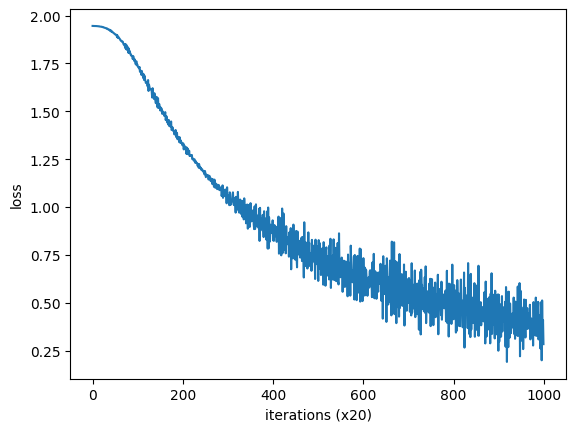

In [17]:
trainer.fit(contexts, target,max_epoch,batch_size)
trainer.plot()

In [18]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

i [ 1.1034789  -1.1206895  -1.1418879  -1.1490873   0.19507806]
am [-0.9132961   0.9006      0.918201    0.59145695  1.5853602 ]
tung [ 0.80539876 -0.82264256 -0.9674713  -0.8666474   1.8504506 ]
and [-1.1496773  1.3499302  1.5382203  1.0503998  0.7844605]
was [-1.162871   1.0977609  0.9301272  1.245537  -1.7830466]
ueter [ 1.0895914 -1.0936353 -1.049714  -1.1266856 -1.6312367]
. [-0.87015826  0.05479798 -0.69003266  1.0043595  -1.6232626 ]
